In [10]:
import random
from itertools import permutations
alltours = permutations 

def distance_tour(aTour):
    return sum(distance_points(aTour[i - 1], aTour[i]) 
               for i in range(len(aTour)))

aCity = complex

def distance_points(first, second): return abs(first - second)

def generate_cities (number_of_cities):
    seed=111;width=500;height=300
    random.seed((number_of_cities, seed))
    return frozenset(aCity(random.randint(1, width), random.randint(1, height))
                     for c in range(number_of_cities))

In [11]:
def brute_force(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): return min(tours, key=distance_tour)

In [12]:
!pip install matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

def visualize_tour(tour, style='bo-'): 
    if len(tour) > 1000: plt.figure(figsize=(15, 10))
    start = tour[0:1]
    visualize_segment(tour + start, style)
    visualize_segment(start, 'rD') 
    
def visualize_segment (segment, style='bo-'):
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('off')
    
def X(city): "X axis"; return city.real
def Y(city): "Y axis"; return city.imag

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from time import clock
from collections import Counter

def tsp(algorithm, cities):
    t0 = clock()
    tour = algorithm(cities)
    t1 = clock()
    assert Counter(tour) == Counter(cities)
    visualize_tour(tour)
    print("{}: {} cities -> tour length {:.0f} (in {:.3f} sec)".format(name(algorithm), len(tour), distance_tour(tour), t1 - t0))

def name(algorithm): return algorithm.__name__

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


brute_force: 10 cities -> tour length 1218 (in 12.591 sec)


/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


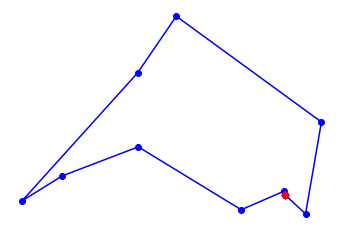

In [18]:
tsp(brute_force, generate_cities(10))

In [19]:
def greedy_algorithm(cities, start=None):
    C = start or first(cities)
    tour = [C]
    unvisited = set(cities - {C})
    while unvisited:
        C = nearest_neighbor(C, unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def first(collection): return next(iter(collection))

def nearest_neighbor(A, cities):
    return min(cities, key=lambda C: distance_points(C, A))

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


greedy_algorithm: 1991 cities -> tour length 15846 (in 0.574 sec)


/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


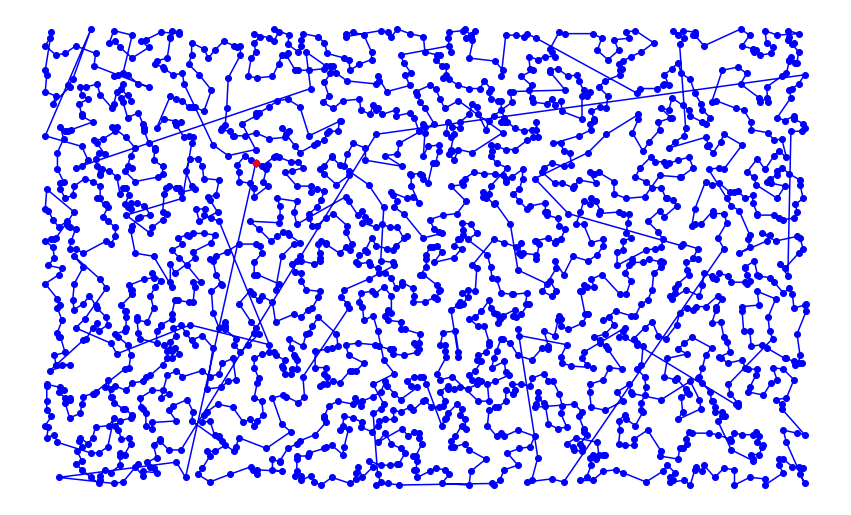

In [20]:
tsp(greedy_algorithm, generate_cities(2000))